# Real and Fake News Classification
---

## -> Problem Description
- To determine if an article is a fake news or not.

## -> About Dataset
- Dataset contains Real and Fake News articles as individual csv files.
- It was downloaded from kaggle [https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset](https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset)

## -> Models tried
- Naive Bayes with TfidfEncoder
- Convolutional Neural Network
- LSTM
- GRU

## -> Evaluation Metrics
- Accuracy
- Precision
- Recall
- F1-score

## 1. Importing Required Libraries
---

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [93]:
from tensorflow.keras import layers
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [3]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

## 2. Getting the data
---

In [4]:
# getting the real and fake news dataset
real_dataset = pd.read_csv("Dataset/News/True.csv", parse_dates=["date"], low_memory=False)
fake_dataset = pd.read_csv("Dataset/News/Fake.csv", parse_dates=["date"], low_memory=False)

In [5]:
# viewing real news dataset
real_dataset.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,2017-12-31
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,2017-12-29
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,2017-12-31
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,2017-12-30
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,2017-12-29


In [6]:
# viewing fake news dataset
fake_dataset.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [7]:
# printing a sample
print(f"Title: {real_dataset.title[0]}\nText: {fake_dataset.text[0]}")

Title: As U.S. budget fight looms, Republicans flip their fiscal script
Text: Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and  the very dishonest fake news media.  The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year,  President Angry Pants tweeted.  2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America!  Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this des

In [8]:
# total data in dataset
len(real_dataset), len(fake_dataset)

(21417, 23481)

In [9]:
# types of news and their counts
real_dataset["subject"].value_counts()

politicsNews    11272
worldnews       10145
Name: subject, dtype: int64

In [10]:
# types of news and their counts
fake_dataset["subject"].value_counts()

News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64

In [11]:
# checking for null values
real_dataset.isna().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [12]:
# checking for null values
fake_dataset.isna().sum()

title      0
text       0
subject    0
date       0
dtype: int64

## 3. Preprocessing the data
---

In [13]:
real_dataset["target"] = 0
real_dataset.head()

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,2017-12-31,0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,2017-12-29,0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,2017-12-31,0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,2017-12-30,0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,2017-12-29,0


In [14]:
fake_dataset["target"] = 1
fake_dataset.head()

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


In [29]:
real_fake_combined_df = real_dataset.append(fake_dataset).drop(["title", "subject", "date"], axis=1).reset_index(drop=True)
real_fake_combined_df.head()

C:\Users\Kathir\AppData\Local\Temp\ipykernel_12008\3452615258.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real_fake_combined_df = real_dataset.append(fake_dataset).drop(["title", "subject", "date"], axis=1).reset_index(drop=True)


,text,target
0,WASHINGTON (Reuters) - The head of a conservat...,0
1,WASHINGTON (Reuters) - Transgender people will...,0
2,WASHINGTON (Reuters) - The special counsel inv...,0
3,WASHINGTON (Reuters) - Trump campaign adviser ...,0
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,0


In [30]:
real_fake_combined_df.tail()

,text,target
44893,21st Century Wire says As 21WIRE reported earl...,1
44894,21st Century Wire says It s a familiar theme. ...,1
44895,Patrick Henningsen 21st Century WireRemember ...,1
44896,21st Century Wire says Al Jazeera America will...,1
44897,21st Century Wire says As 21WIRE predicted in ...,1


In [31]:
len(real_fake_combined_df)

44898

In [32]:
real_fake_combined_df.to_csv("Dataset/News_modified/real_fake_combined_df.csv", index=False)

In [33]:
df = pd.read_csv("Dataset/News_modified/real_fake_combined_df.csv")
df.head()

,text,target
0,WASHINGTON (Reuters) - The head of a conservat...,0
1,WASHINGTON (Reuters) - Transgender people will...,0
2,WASHINGTON (Reuters) - The special counsel inv...,0
3,WASHINGTON (Reuters) - Trump campaign adviser ...,0
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,0


In [34]:
len(df), len(df)==len(real_fake_combined_df)

(44898, True)

In [35]:
df["text"][0]

'WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non-defense “discretionary” spending on programs that support educat

### 3.1. Making Train and Test split

In [73]:
# making train and test split
X_train, X_test, y_train, y_test = train_test_split(real_fake_combined_df["text"].to_numpy(), real_fake_combined_df["target"].to_numpy(), test_size=0.1, random_state=42)
len(X_train), len(y_train), len(X_test), len(y_test)

(40408, 40408, 4490, 4490)

In [74]:
print(f"Text:\n{X_train[0]}\n")
print(f"Target: {y_train[0]}")

Text:
If Donald Trump thought he was going to get away with calling the pastor of the black church he visited in Flint, Michigan a  nervous mess,  he was dead wrong. Pastor Faith Green-Timmons is a strong woman and rock in her community. She didn t let Trump get away with trying to use her church as a platform to attack Democratic nominee Hillary Clinton, and, as he always done when he feels embarrassed or attacked, Trump went on Fox News and trashed Pastor Green-Timmons. That isn t all, either   Trump flat-out lied about what happened while he was at the church and how his visit was received.Well, this pastor was the wrong one for Trump to decide to start another one of his personal feuds with. Refusing to sink to Trump s pattern of low-road insults when there is any sort of conflict whatsoever, Pastor Green-Timmons had this to say regarding Trump s remarks and her interruption of his statements in her church: They had plans to make it a little more than they originally said, and I sa

### 3.2. Converting Text data to numbers

#### 3.2.1. Text Vectorization (Tokenization) (Word level)

In [75]:
# finding average length of a sample
np.round(sum([len(word.split()) for word in X_train])/len(X_train))

406.0

In [114]:
# finding sentence length of all text in X_train
sent_len = [len(word.split()) for word in X_train]
sent_len[:5], np.mean(sent_len)

([519, 960, 405, 315, 148], 405.53464660463277)

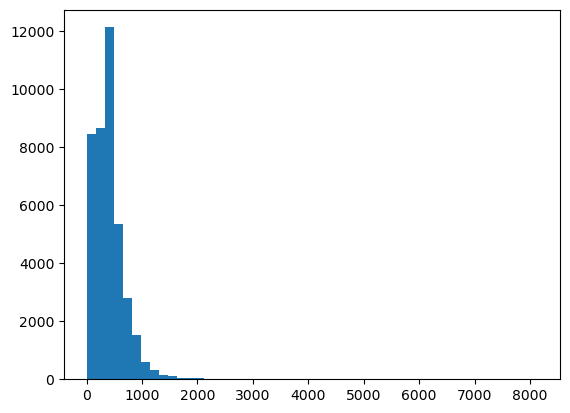

In [113]:
# plotting the sentence length
plt.hist(sent_len, bins=50);

In [89]:
# creating text vectorizer
max_vocab_length = 10000
avg_length = 406

text_vectorizer = tf.keras.layers.TextVectorization(max_tokens=max_vocab_length, output_sequence_length=avg_length, output_mode="int")
text_vectorizer.adapt(X_train)

In [90]:
# testing the text vectorizer
text_vectorizer(X_test[0])

<tf.Tensor: shape=(406,), dtype=int64, numpy=
array([  69,   18,   10,   90,   72,   12,    7, 2263,    6,   32,   29,
        351,    3, 1288,   15,   64,   41,  154, 1084,   29, 5346,   21,
          2, 1840,    6,   32, 2680,    3, 4181,    8,   65,   29, 1084,
       2214,   56,    4,   27,    3,   93,   15,   10,  679,   97,   48,
          5, 4573,  304,    2, 1378, 3770,  348,   57, 6219,    6,   15,
        762,    8,   65,   29,  100,    1,    7,    2,  570,  168,    1,
       3721,    1,   30, 2026,    2,  155, 1746,  224,   12, 1952,   64,
         13,   12,  100, 2323,    8,   69,   18, 1409,    6,  109,  220,
         18,   94, 1490,  616, 1973, 3222,  114,   20,  224, 1219,    2,
        100, 4634, 6904,  261,  149,   69,   18,    6,    2, 6904,  198,
        908,   30, 1286, 6638,    9,  220,  146,  139,  437,  117,   74,
          7,  276,   27,  271,   12,  545,  191,  100,   27, 1581, 5858,
          5,  409, 6075,    3,  454,   18,  120, 5308,    8,   32,  108,
     

#### 3.2.2. Embedding (Word level)

In [91]:
# creating an embedding layer
embedding = tf.keras.layers.Embedding(input_dim=max_vocab_length, input_length=avg_length, output_dim=512)
embedding
# returns 512 length feature vector

In [92]:
# testing the embedding layer
embedding(text_vectorizer(X_test[0]))

<tf.Tensor: shape=(406, 512), dtype=float32, numpy=
array([[ 0.02067545,  0.03499946,  0.01121763, ...,  0.02937856,
         0.02777812, -0.01006733],
       [ 0.03446354, -0.0001402 ,  0.04589177, ..., -0.03230377,
         0.03147701,  0.02301872],
       [-0.0015551 ,  0.0475315 ,  0.03561641, ..., -0.04454602,
         0.00707669, -0.04775546],
       ...,
       [ 0.02605715, -0.00751252, -0.01629356, ...,  0.04291553,
        -0.03950542, -0.02634537],
       [ 0.02605715, -0.00751252, -0.01629356, ...,  0.04291553,
        -0.03950542, -0.02634537],
       [ 0.02605715, -0.00751252, -0.01629356, ...,  0.04291553,
        -0.03950542, -0.02634537]], dtype=float32)>

## 4. Creating Callbacks and Evaluation function
---
- Callbacks
    - EarlyStopping Callback
    - ModelCheckpoint Callback
    - Tensorboard Callback
- Evaluation function
    - Accuracy
    - Precision
    - Recall
    - F1-score

In [96]:
# creating EarlyStopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=30, verbose=1)

# creating Tensorboard callback
def create_tensorboard_callback(model_name, file_path):
    return tf.keras.callbacks.TensorBoard(log_dir=file_path+"/"+model_name, update_freq="epoch")

# ModelCheckpoint callback can be created when we fit the model to train data

In [97]:
# creating evaluation function that calculates a model's accuracy, precision, recall, f1-score
def evaluate_preds(y_true, y_preds):
    accuracy = accuracy_score(y_true, y_preds)
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_true, y_preds, average="weighted", zero_division=0)
    # zero_division=0 for removing a warning
    metrics_dict = {
        "Accuracy":accuracy*100,
        "Precision": precision*100,
        "Recall": recall*100,
        "F1-score": f1_score*100
    }
    return metrics_dict

In [98]:
def plot_loss_curves(history):
    """
    Plots the loss curves of a model
    """
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    epochs = range(len(history.history['loss']))

    # Plot loss
    plt.plot(epochs, loss, label='training_loss')
    plt.plot(epochs, val_loss, label='val_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.figure()
    plt.plot(epochs, accuracy, label='training_accuracy')
    plt.plot(epochs, val_accuracy, label='val_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();

## 5. Creating a Naive bayes model
---

In [115]:
# creating a pipeline
model_1 = Pipeline(steps=[
    ("TfidfVectorizer", TfidfVectorizer()),
    ("model_1_naive_bayes", MultinomialNB())
])

# fitting the model
model_1.fit(X_train, y_train)

Pipeline(steps=[('TfidfVectorizer', TfidfVectorizer()),
                ('model_1_naive_bayes', MultinomialNB())])

### 5.1. Evaluating the model

In [116]:
# evaluating the model_1
model_1.score(X_test, y_test)

0.9374164810690423

In [176]:
%%time
# making predictions with the model
model_1_preds = model_1.predict(X_test)
model_1_preds[:5]

Wall time: 1.07 s


array([1, 1, 1, 0, 1], dtype=int64)

In [177]:
model_1_results = evaluate_preds(y_true=y_test, y_preds=model_1_preds)
model_1_results

{'Accuracy': 93.74164810690424,
 'Precision': 93.74566900133556,
 'Recall': 93.74164810690424,
 'F1-score': 93.74026325959933}

## 6. Creating a Conv1D model
---

In [120]:
# setting file path for TensorBoard logs and ModelCheckpoint
TENSORBOARD_LOG_PATH = "callbacks/tensorboard"
MODELCHECKPOINT_PATH = "callbacks/model_checkpoints"

In [156]:
# set random seed
tf.random.set_seed(42)

# creating a model using keras Functional API
inputs = layers.Input(shape=(1,), dtype="string", name="input_layer")
x = text_vectorizer(inputs)
x = embedding(x)

x = layers.Conv1D(128, 4, activation="relu")(x)
x = layers.MaxPool1D()(x)

x = layers.Conv1D(128, 4, activation="relu")(x)
x = layers.MaxPool1D()(x)

x = layers.Conv1D(64, 4, activation="relu")(x)
x = layers.MaxPool1D()(x)

x = layers.Flatten()(x)
x = layers.Dense(10, activation="relu")(x)
outputs = layers.Dense(1, activation="sigmoid", name="output_layer")(x)

model_2 = tf.keras.Model(inputs=inputs, outputs=outputs, name="model_2_Conv1D")

# compiling the model
model_2.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer="Adam",
    metrics=["accuracy"]
)

In [160]:
# fitting the model
model_2_history = model_2.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test), callbacks=[early_stopping, create_tensorboard_callback(model_name=model_2.name, file_path=TENSORBOARD_LOG_PATH), tf.keras.callbacks.ModelCheckpoint(filepath=MODELCHECKPOINT_PATH+"/"+model_2.name, monitor="val_loss", save_best_only=True)], batch_size=64)

Epoch 1/5
631/632 [============================>.] - ETA: 0s - loss: 4.4280e-04 - accuracy: 1.0000

INFO:tensorflow:Assets written to: callbacks/model_checkpoints\model_2_Conv1D\assets


INFO:tensorflow:Assets written to: callbacks/model_checkpoints\model_2_Conv1D\assets


632/632 [==============================] - 22s 34ms/step - loss: 4.4253e-04 - accuracy: 1.0000 - val_loss: 0.0222 - val_accuracy: 0.9976
Epoch 2/5
632/632 [==============================] - 20s 32ms/step - loss: 4.1491e-04 - accuracy: 1.0000 - val_loss: 0.0330 - val_accuracy: 0.9971
Epoch 3/5
632/632 [==============================] - 22s 35ms/step - loss: 4.1330e-04 - accuracy: 1.0000 - val_loss: 0.0284 - val_accuracy: 0.9973
Epoch 4/5
632/632 [==============================] - 22s 35ms/step - loss: 2.8853e-04 - accuracy: 1.0000 - val_loss: 0.0313 - val_accuracy: 0.9973
Epoch 5/5
632/632 [==============================] - 22s 35ms/step - loss: 2.9445e-04 - accuracy: 1.0000 - val_loss: 0.0315 - val_accuracy: 0.9973


### 6.1. Evaluating the model

In [161]:
# evaluating the model_2
model_2.evaluate(X_test, y_test)

141/141 [==============================] - 2s 12ms/step - loss: 0.0315 - accuracy: 0.9973


[0.031457871198654175, 0.9973273873329163]

In [162]:
# loading the best performing model
model_2 = tf.keras.models.load_model(filepath=MODELCHECKPOINT_PATH+"/"+model_2.name)
model_2.evaluate(X_train, y_train)

1263/1263 [==============================] - 13s 10ms/step - loss: 3.5397e-04 - accuracy: 0.9999


[0.0003539716708473861, 0.9999257326126099]

In [172]:
%%time
# making predictions
model_2_preds = model_2.predict(X_test)
model_2_preds

141/141 [==============================] - 2s 11ms/step
Wall time: 1.58 s


array([[1.000000e+00],
       [1.000000e+00],
       [1.000000e+00],
       ...,
       [3.111791e-34],
       [1.000000e+00],
       [1.000000e+00]], dtype=float32)

In [173]:
# rounding off to 0 or 1
model_2_preds = np.round(model_2_preds)
model_2_preds

array([[1.],
       [1.],
       [1.],
       ...,
       [0.],
       [1.],
       [1.]], dtype=float32)

In [174]:
# calculating results
model_2_results = evaluate_preds(y_true=y_test, y_preds=model_2_preds)
model_2_results

{'Accuracy': 99.75501113585746,
 'Precision': 99.75547191281234,
 'Recall': 99.75501113585746,
 'F1-score': 99.7549987885328}

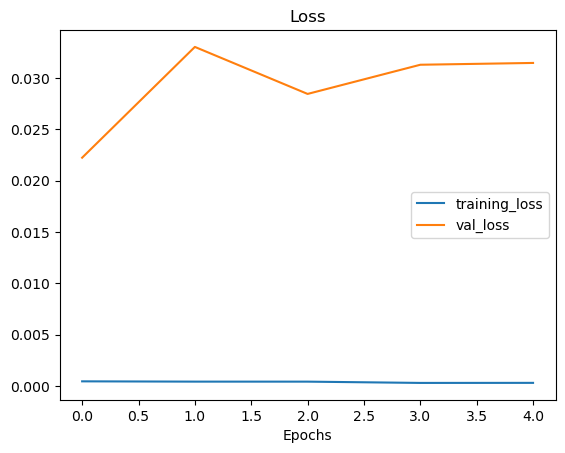

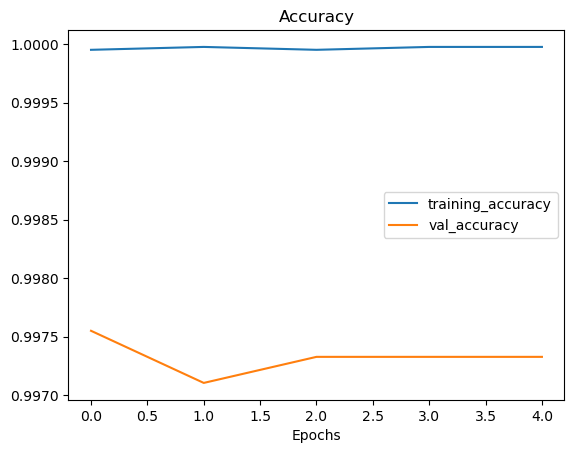

In [175]:
# plot loss curves
plot_loss_curves(model_2_history)

- This model is highly accurate, we could stop here and choose this model as the best
- But we continue to check other models performance

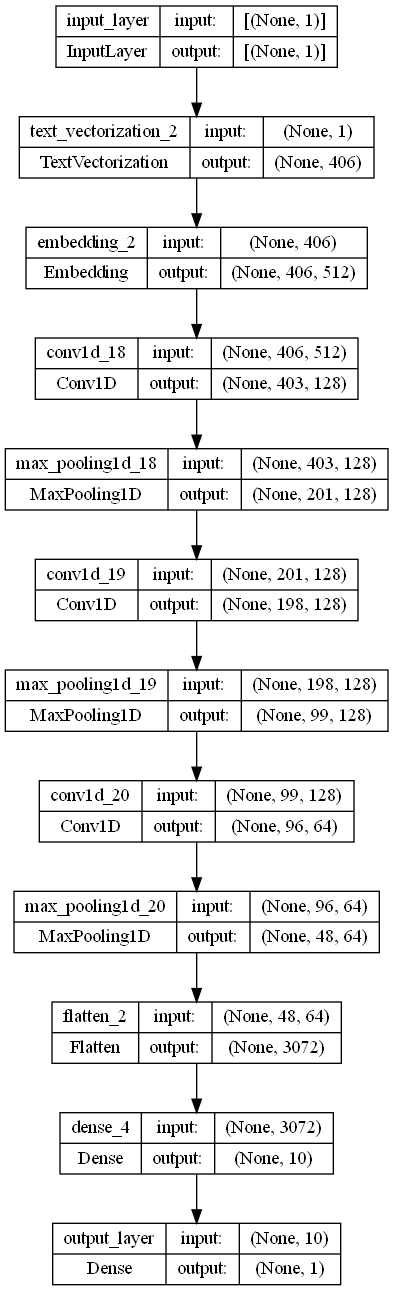

In [179]:
# plotting the model
tf.keras.utils.plot_model(model_2, show_shapes=True)

## 7. Creating LSTM model
---

In [187]:
# creating LSTM model using keras Functional API
inputs = layers.Input(shape=(1,), dtype=tf.string, name="input_layer")
x = text_vectorizer(inputs)
x = embedding(x)

x = layers.LSTM(64)(x)
x = layers.Dense(32, activation="relu")(x)

outputs = layers.Dense(1, activation="sigmoid", name="output_layer")(x)

model_3 = tf.keras.Model(inputs, outputs, name="model_3_LSTM")

# compiling the model
model_3.compile(
    loss="binary_crossentropy",
    optimizer="Adam",
    metrics=["accuracy"]
)

In [188]:
# fitting the model
model_3_history = model_3.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test), callbacks=[early_stopping, create_tensorboard_callback(model_name=model_3.name, file_path=TENSORBOARD_LOG_PATH), tf.keras.callbacks.ModelCheckpoint(filepath=MODELCHECKPOINT_PATH+"/"+model_3.name, monitor="val_loss", save_best_only=True)], batch_size=64)

Epoch 1/5
632/632 [==============================] - ETA: 0s - loss: 0.1881 - accuracy: 0.9279

INFO:tensorflow:Assets written to: callbacks/model_checkpoints\model_3_LSTM\assets


INFO:tensorflow:Assets written to: callbacks/model_checkpoints\model_3_LSTM\assets


632/632 [==============================] - 51s 77ms/step - loss: 0.1881 - accuracy: 0.9279 - val_loss: 0.0458 - val_accuracy: 0.9893
Epoch 2/5
632/632 [==============================] - ETA: 0s - loss: 0.0340 - accuracy: 0.9909

INFO:tensorflow:Assets written to: callbacks/model_checkpoints\model_3_LSTM\assets


INFO:tensorflow:Assets written to: callbacks/model_checkpoints\model_3_LSTM\assets


632/632 [==============================] - 39s 61ms/step - loss: 0.0340 - accuracy: 0.9909 - val_loss: 0.0184 - val_accuracy: 0.9951
Epoch 3/5
632/632 [==============================] - ETA: 0s - loss: 0.0160 - accuracy: 0.9965

INFO:tensorflow:Assets written to: callbacks/model_checkpoints\model_3_LSTM\assets


INFO:tensorflow:Assets written to: callbacks/model_checkpoints\model_3_LSTM\assets


632/632 [==============================] - 39s 61ms/step - loss: 0.0160 - accuracy: 0.9965 - val_loss: 0.0144 - val_accuracy: 0.9976
Epoch 4/5
632/632 [==============================] - ETA: 0s - loss: 0.0061 - accuracy: 0.9983

INFO:tensorflow:Assets written to: callbacks/model_checkpoints\model_3_LSTM\assets


INFO:tensorflow:Assets written to: callbacks/model_checkpoints\model_3_LSTM\assets


632/632 [==============================] - 39s 62ms/step - loss: 0.0061 - accuracy: 0.9983 - val_loss: 0.0074 - val_accuracy: 0.9982
Epoch 5/5
632/632 [==============================] - 35s 55ms/step - loss: 0.0024 - accuracy: 0.9995 - val_loss: 0.0098 - val_accuracy: 0.9982


### 7.1. Evaluating the model

In [189]:
# evaluating the model
model_3.evaluate(X_test, y_test)

141/141 [==============================] - 4s 28ms/step - loss: 0.0098 - accuracy: 0.9982


[0.009783676825463772, 0.9982182383537292]

In [190]:
# loading the best performing model
model_3 = tf.keras.models.load_model(filepath=MODELCHECKPOINT_PATH+"/"+model_3.name)
model_3.evaluate(X_test, y_test)

141/141 [==============================] - 4s 25ms/step - loss: 0.0074 - accuracy: 0.9982


[0.007415274623781443, 0.9982182383537292]

In [191]:
%%time
# making predictions
model_3_preds = model_3.predict(X_test)
model_3_preds[:5]

141/141 [==============================] - 4s 24ms/step
Wall time: 3.76 s


array([[9.9997294e-01],
       [9.9998355e-01],
       [9.9997401e-01],
       [3.8898172e-04],
       [9.9995863e-01]], dtype=float32)

In [192]:
# rounding off predictions to 0 and 1
model_3_preds = np.round(model_3_preds)
model_3_preds[:5]

array([[1.],
       [1.],
       [1.],
       [0.],
       [1.]], dtype=float32)

In [193]:
# calculating results
model_3_results = evaluate_preds(y_true=y_test, y_preds=model_3_preds)
model_3_results

{'Accuracy': 99.82182628062361,
 'Precision': 99.82182628062361,
 'Recall': 99.82182628062361,
 'F1-score': 99.82182628062361}

In [196]:
model_2_results
# model_3 slightly outperformed model_2 with less number of layers and hidden units

{'Accuracy': 99.75501113585746,
 'Precision': 99.75547191281234,
 'Recall': 99.75501113585746,
 'F1-score': 99.7549987885328}

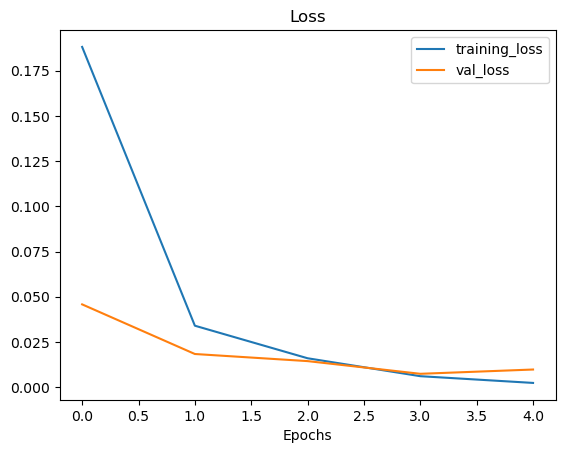

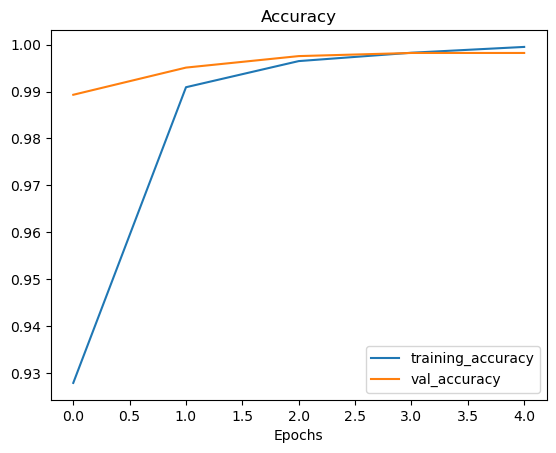

In [197]:
# plot loss curves of model_3
plot_loss_curves(model_3_history)

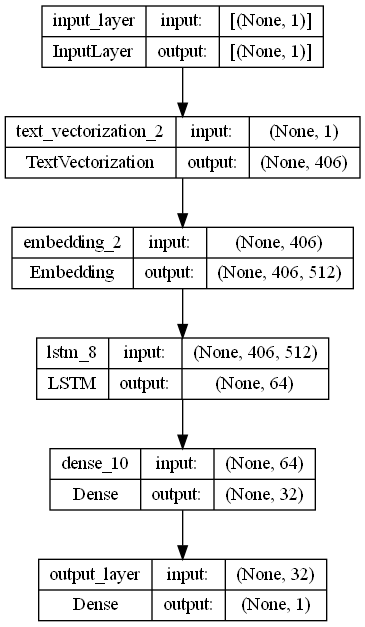

In [200]:
# plotting model_3
tf.keras.utils.plot_model(model_3, show_shapes=True)

## 8. Creating GRU model
---

In [264]:
# creating GRU model with keras Functional API
inputs = layers.Input(shape=(1,), dtype=tf.string, name="input_layer")
x = text_vectorizer(inputs)
x = embedding(x)

x = layers.GRU(32)(x)
x = layers.Dense(32, activation="relu")(x)

outputs = layers.Dense(1, activation="sigmoid", name="output_layer")(x)

model_4 = tf.keras.Model(inputs, outputs, name="model_4_GRU")

# compiling the model
model_4.compile(
    loss="binary_crossentropy",
    optimizer="Adam",
    metrics=["accuracy"]
)

In [265]:
# fitting the model
model_4_history = model_4.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test), callbacks=[early_stopping, create_tensorboard_callback(model_name=model_4.name, file_path=TENSORBOARD_LOG_PATH), tf.keras.callbacks.ModelCheckpoint(filepath=MODELCHECKPOINT_PATH+"/"+model_4.name, monitor="val_loss", save_best_only=True)], batch_size=64)

Epoch 1/5
631/632 [============================>.] - ETA: 0s - loss: 0.0788 - accuracy: 0.9580

INFO:tensorflow:Assets written to: callbacks/model_checkpoints\model_4_GRU\assets


INFO:tensorflow:Assets written to: callbacks/model_checkpoints\model_4_GRU\assets


632/632 [==============================] - 44s 67ms/step - loss: 0.0787 - accuracy: 0.9580 - val_loss: 0.0104 - val_accuracy: 0.9982
Epoch 2/5
632/632 [==============================] - 37s 58ms/step - loss: 0.0164 - accuracy: 0.9973 - val_loss: 0.0136 - val_accuracy: 0.9978
Epoch 3/5
632/632 [==============================] - ETA: 0s - loss: 0.0046 - accuracy: 0.9992

INFO:tensorflow:Assets written to: callbacks/model_checkpoints\model_4_GRU\assets


INFO:tensorflow:Assets written to: callbacks/model_checkpoints\model_4_GRU\assets


632/632 [==============================] - 44s 70ms/step - loss: 0.0046 - accuracy: 0.9992 - val_loss: 0.0063 - val_accuracy: 0.9989
Epoch 4/5
632/632 [==============================] - 38s 60ms/step - loss: 0.0029 - accuracy: 0.9995 - val_loss: 0.0076 - val_accuracy: 0.9987
Epoch 5/5
632/632 [==============================] - 36s 57ms/step - loss: 2.7064e-04 - accuracy: 1.0000 - val_loss: 0.0096 - val_accuracy: 0.9987


### 8.1. Evaluating the model

In [266]:
# evaluating the model
model_4.evaluate(X_test, y_test)

141/141 [==============================] - 4s 26ms/step - loss: 0.0096 - accuracy: 0.9987


[0.009646249003708363, 0.9986637234687805]

In [267]:
# loading the best performing model
model_4 = tf.keras.models.load_model(filepath=MODELCHECKPOINT_PATH+"/"+model_4.name)
model_4.evaluate(X_test, y_test)

141/141 [==============================] - 6s 36ms/step - loss: 0.0063 - accuracy: 0.9989


[0.006317015737295151, 0.9988864064216614]

In [268]:
%%time
# making predictions
model_4_preds = model_4.predict(X_test)
model_4_preds[:5]

141/141 [==============================] - 3s 22ms/step
Wall time: 3.61 s


array([[9.9983096e-01],
       [9.9955803e-01],
       [9.9983811e-01],
       [2.4428542e-04],
       [9.9974364e-01]], dtype=float32)

In [269]:
# rounding off the predictions
model_4_preds = np.round(model_4_preds)
model_4_preds[:5]

array([[1.],
       [1.],
       [1.],
       [0.],
       [1.]], dtype=float32)

In [270]:
# calculating the results
model_4_results = evaluate_preds(y_true=y_test, y_preds=model_4_preds)
model_4_results

{'Accuracy': 99.88864142538975,
 'Precision': 99.88864980748548,
 'Recall': 99.88864142538975,
 'F1-score': 99.88864065685733}

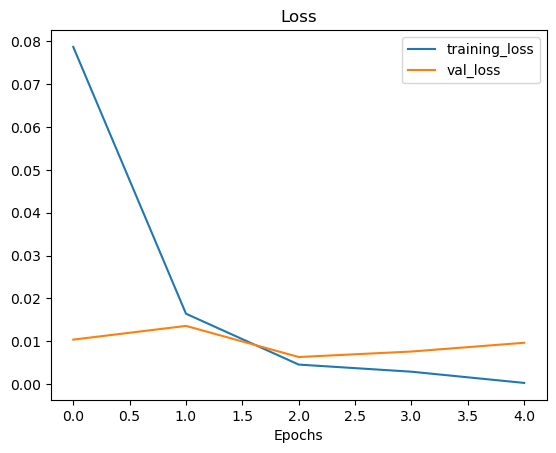

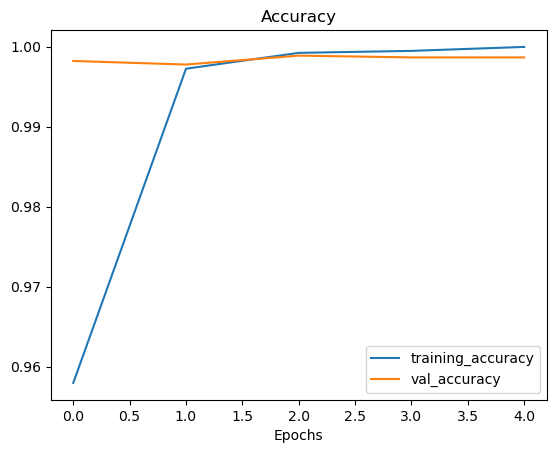

In [271]:
# plot loss curves
plot_loss_curves(model_4_history)

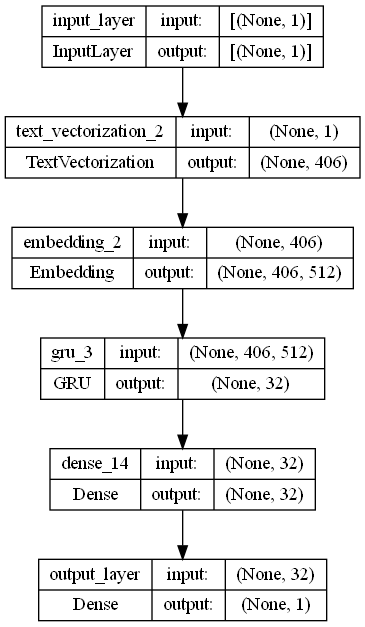

In [272]:
# plotting the model
tf.keras.utils.plot_model(model_4, show_shapes=True)

## 9. Comparing the results
---

In [273]:
# creating a dataframe with results of all the models
all_models_results = pd.DataFrame({
    "Model_1_Naive_bayes": model_1_results,
    "Model_2_Conv1D": model_2_results,
    "Model_3_LSTM": model_3_results,
    "Model_4_GRU": model_4_results
})
all_models_results

,Model_1_Naive_bayes,Model_2_Conv1D,Model_3_LSTM,Model_4_GRU
Accuracy,93.741648,99.755011,99.821826,99.888641
Precision,93.745669,99.755472,99.821826,99.888650
Recall,93.741648,99.755011,99.821826,99.888641
F1-score,93.740263,99.754999,99.821826,99.888641


In [274]:
# transposing the results to make it more readable
all_models_results = all_models_results.T

In [275]:
all_models_results

,Accuracy,Precision,Recall,F1-score
Model_1_Naive_bayes,93.741648,93.745669,93.741648,93.740263
Model_2_Conv1D,99.755011,99.755472,99.755011,99.754999
Model_3_LSTM,99.821826,99.821826,99.821826,99.821826
Model_4_GRU,99.888641,99.888650,99.888641,99.888641


In [276]:
# saving the results
all_models_results.to_csv("All Models Results.csv")

Text(0.5, 1.0, 'All Models F1-Score Comparison')

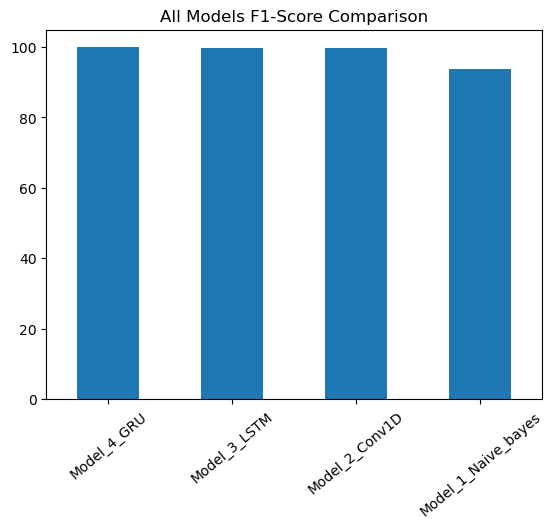

In [277]:
# plotting the f1-score
all_models_results.sort_values(by="F1-score", ascending=False)["F1-score"].plot.bar()
plt.xticks(rotation=40)
plt.title("All Models F1-Score Comparison")

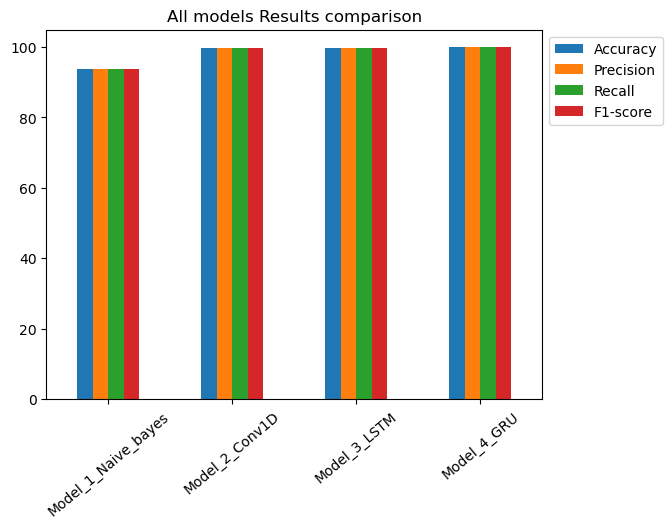

In [278]:
# Overall comparison
all_models_results.plot.bar()
plt.xticks(rotation=40)
plt.title("All models Results comparison")
plt.legend(bbox_to_anchor=(1.0, 1.0));

In [279]:
# viewing tensorboard logs
%load_ext tensorboard
%tensorboard --logdir "callbacks/tensorboard/"

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Launching TensorBoard...

## 10. Making Predictions on Custom Text
---

In [280]:
# creating a function to make predictions on custom text
def custom_predictions(model, text):
    """
    Makes predictions on given text and returns whether it is a real news or not
    """
    # making predictions
    preds = model.predict(text)

    # rounding off the predictions
    preds = int(np.round(preds))

    # returning the predictions
    if preds == 0:
        return "Real news"
    return "Fake news"

In [281]:
news = ["If we protect every other government building or public venue with armed guards, why shouldn t our schools be protected with armed teachers? A Texas Sheriff shocked an MSNBC host when he discussed how he prepares local teachers to be armed in the classroom. common sense solution? You betcha!Sheriff Paul Cairney of Argyle, Texas, described the process by which staff members can carry firearms in the school district. The Sheriff said that the staff at the school who choose to carry a firearm go through an intense round of interviews and training before they are allowed to carry on campus. The MSNBC host was flabbergasted at the practice and asked the Sheriff about concerns for the safety of the students in the school when there are firearms around.Sheriff Cairney:  The time to do nothing is over THE PROCESS TO BECOME A SCHOOL MARSHALL:To become a school marshal, those employees must undergo extensive active shooter and firearms training with the state. They must also undergo a mental health evaluation. They receive a school marshal designation by the Texas Commission on Law Enforcement and must renew their license every two years by undergoing the same training and evaluation. Outside of campuses in Keene and Argyle, signs warn visitors that there are staff members who are armed and are prepared to protect children."]

In [282]:
%%time
custom_predictions(model_4, text=news)
# the given news is fake

1/1 [==============================] - 0s 55ms/step
Wall time: 87.4 ms


'Fake news'

## 11. Evaluating on Custom Dataset and Saving the Final Model
---

In [283]:
# shuffling the data
real_fake_combined_shuffled_df = real_fake_combined_df.sample(frac=1.0, random_state=42)
real_fake_combined_shuffled_df.head()

,text,target
22216,"Donald Trump s White House is in chaos, and th...",1
27917,Now that Donald Trump is the presumptive GOP n...,1
25007,Mike Pence is a huge homophobe. He supports ex...,1
1377,SAN FRANCISCO (Reuters) - California Attorney ...,0
32476,Twisted reasoning is all that comes from Pelos...,1


In [284]:
# preparing the entire dataset
all_text_data = real_fake_combined_shuffled_df["text"].to_numpy()
all_text_labels = real_fake_combined_shuffled_df["target"].to_numpy()
all_text_data[-5:], all_text_labels[-5:]

(array(['ABUJA (Reuters) - The United States has formally agreed to sell 12 Super Tucano A-29 planes and weapons to Nigeria, the West African country s air force said, confirming the resurrection of a deal frozen by the Obama administration over rights concerns. Former U.S. President Barack Obama delayed the sale in one of his last decisions in office after the Nigerian Air Force bombed a refugee camp in January. But his successor Donald Trump decided to press on with the transaction to support Nigeria s efforts to fight Boko Haram militants and to boost U.S. defense jobs, sources told Reuters in April. The U.S. ambassador to Nigeria presented letters of offer and acceptance to Nigeria s air force earlier on Wednesday, the air force said in a statement.  It said the U.S. State Department had approved the sale and final agreements would be signed and necessary payments made before Feb. 20. There was no immediate statement from the U.S. embassy or from authorities in Washington. U.S. gov

In [288]:
# recreating model_4_GRU
inputs = layers.Input(shape=(1,), dtype=tf.string, name="input_layer")
x = text_vectorizer(inputs)
x = embedding(x)

x = layers.GRU(32)(x)
x = layers.Dense(32, activation="relu")(x)

outputs = layers.Dense(1, activation="sigmoid", name="output_layer")(x)

final_model = tf.keras.Model(inputs, outputs, name="final_model")

# compiling the final model
final_model.compile(
    loss="binary_crossentropy",
    optimizer="Adam",
    metrics=["accuracy"]
)

# fitting the final model on entire dataset
final_model.fit(all_text_data, all_text_labels, epochs=5, callbacks=[tf.keras.callbacks.ModelCheckpoint(filepath=MODELCHECKPOINT_PATH+"/"+final_model.name, monitor="loss", save_best_only=True)], batch_size=64)

Epoch 1/5
702/702 [==============================] - ETA: 0s - loss: 0.0551 - accuracy: 0.9711

INFO:tensorflow:Assets written to: callbacks/model_checkpoints\final_model\assets


INFO:tensorflow:Assets written to: callbacks/model_checkpoints\final_model\assets


702/702 [==============================] - 44s 61ms/step - loss: 0.0551 - accuracy: 0.9711
Epoch 2/5
701/702 [============================>.] - ETA: 0s - loss: 0.0046 - accuracy: 0.9991

INFO:tensorflow:Assets written to: callbacks/model_checkpoints\final_model\assets


INFO:tensorflow:Assets written to: callbacks/model_checkpoints\final_model\assets


702/702 [==============================] - 45s 64ms/step - loss: 0.0046 - accuracy: 0.9991
Epoch 3/5
701/702 [============================>.] - ETA: 0s - loss: 0.0014 - accuracy: 0.9997

INFO:tensorflow:Assets written to: callbacks/model_checkpoints\final_model\assets


INFO:tensorflow:Assets written to: callbacks/model_checkpoints\final_model\assets


702/702 [==============================] - 51s 72ms/step - loss: 0.0014 - accuracy: 0.9997
Epoch 4/5
702/702 [==============================] - ETA: 0s - loss: 4.4447e-04 - accuracy: 0.9999

INFO:tensorflow:Assets written to: callbacks/model_checkpoints\final_model\assets


INFO:tensorflow:Assets written to: callbacks/model_checkpoints\final_model\assets


702/702 [==============================] - 47s 67ms/step - loss: 4.4447e-04 - accuracy: 0.9999
Epoch 5/5
702/702 [==============================] - ETA: 0s - loss: 3.5818e-04 - accuracy: 1.0000

INFO:tensorflow:Assets written to: callbacks/model_checkpoints\final_model\assets


INFO:tensorflow:Assets written to: callbacks/model_checkpoints\final_model\assets


702/702 [==============================] - 46s 66ms/step - loss: 3.5818e-04 - accuracy: 1.0000


In [289]:
# loading the best performing model
final_model = tf.keras.models.load_model(filepath=MODELCHECKPOINT_PATH+"/"+final_model.name)

In [318]:
# evaluating on custom test data that the model never seen
custom_text_df = pd.read_csv("Dataset/custom/test.csv").drop(["title", "author"], axis=1).reset_index(drop=True)
custom_text = custom_text_df["text"].to_numpy().astype("str")
custom_text[:5]

array(['PALO ALTO, Calif.  —   After years of scorning the political process, Silicon Valley has leapt into the fray. The prospect of a President Donald J. Trump is pushing the tech community to move beyond its traditional role as donors and to embrace a new existence as agitators and activists. A distinguished venture capital firm emblazoned on its corporate home page an earthy   epithet. One prominent tech chieftain says the consequences of Mr. Trump’s election would “range between disastrous and terrible. ” Another compares him to a dictator. And nearly 150 tech leaders signed an open letter decrying Mr. Trump and his campaign of “anger” and “bigotry. ” Not quite all the action is  . Peter Thiel, a founder of PayPal and Palantir who was the first outside investor in Facebook, spoke at the Republican convention in July. The New York Times reported on Saturday that Mr. Thiel is giving $1. 25 million to support Mr. Trump’s candidacy even as other supporters flee. (He also recently gave

In [319]:
len(custom_text)

5200

In [ ]:
def remove_digit(text):
    return "".join(word for word in text if not word.isdigit())

custom_text_modified = []
for i in range(len(custom_text)):
    custom_text_modified.append(remove_digit(custom_text[i]))

In [331]:
custom_text_modified[1]

'Russian warships ready to strike terrorists near Aleppo .. | Source: Source: Mil.ru Attack aircraft of the Russian aircraft carrier Admiral Kuznetsov get ready to strike terrorists\' positions in the vicinity of Aleppo, sources at the Russian Defense Ministry said, RBC reports. "Insurgents\' attempts to break into Aleppo from outside are meaningless," the source said. The main task of the aircraft carrier aviation group is to strike missile and air blows on the terrorists , whose goal is to enter Aleppo. "After the attacks on terrorists\' positions, one will have to forget about the support for insurgents from the outside," the source said. The Russian group in the Mediterranean Sea consists of the Admiral Kuznetsov aircraft carrier , the heavy nuclear missile cruiser Pyotr Velikiy (Peter the Great) and large anti-submarine ships Severomorsk and Vice-Admiral Kulakov. Russia has increased intelligence activities in Syria to establish the areas, where terrorists are concentrated, as wel

In [324]:
# predicting custom text
custom_preds = final_model.predict(custom_text_modified)
custom_preds

163/163 [==============================] - 4s 25ms/step


array([[8.9094844e-03],
       [9.9998593e-01],
       [2.7248814e-05],
       ...,
       [2.7869921e-04],
       [9.9999642e-01],
       [1.9749098e-04]], dtype=float32)

In [328]:
custom_preds = np.round(custom_preds)
custom_preds

array([[0.],
       [1.],
       [0.],
       ...,
       [0.],
       [1.],
       [0.]], dtype=float32)

In [329]:
# saving the final model
final_model.save("final_model_GRU")

INFO:tensorflow:Assets written to: final_model_GRU\assets


INFO:tensorflow:Assets written to: final_model_GRU\assets


## 12. Summary
---

In [252]:
# all models performance
all_models_results

,Accuracy,Precision,Recall,F1-score
Model_1_Naive_bayes,93.741648,93.745669,93.741648,93.740263
Model_2_Conv1D,99.755011,99.755472,99.755011,99.754999
Model_3_LSTM,99.821826,99.821826,99.821826,99.821826
Model_4_GRU,99.933185,99.933196,99.933185,99.933185


- **The Model_4_GRU is more accurate in classifying real and fake news**
- **Model_1_Naive_bayes is faster in making predictions**